In [1]:
import pandas as pd
import seaborn as sns


In [2]:
df= pd.read_excel("MABJ-Customer-Sales.xlsx",sheet_name=["Sales_data","Product_data","Date_data"])

In [3]:
Date_df=df.get('Date_data')

In [4]:
Date_df.head()

,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey
0,20170701,42917,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 01",201707
1,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707
2,20170703,42919,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 03",201707
3,20170704,42920,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 04",201707
4,20170705,42921,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 05",201707


In [5]:
Sales_df = df.get('Sales_data')

In [6]:
Sales_df.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994


In [16]:
SD=pd.merge(Sales_df,Date_df,how='inner',left_on='OrderDateKey',right_on="DateKey")

In [17]:
SD.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707


In [31]:
NewSD=SD.assign(NetSale=round(SD["Gross Sales "]-(SD["Product Cost"]*SD["Order Quantity"])))

In [33]:
NewSD.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,Product Cost,Gross Sales,DateKey,Date,Fiscal Year,Fiscal Quarter,Month,Full Date,MonthKey,NetSale
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707,127.0
1,43659002,676,-1,350,20170702,20170712,20170709.0,5,3,2024.994,1898.0944,6074.982,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707,381.0
2,43659003,676,-1,351,20170702,20170712,20170709.0,5,1,2024.994,1898.0944,2024.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707,127.0
3,43659004,676,-1,344,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707,128.0
4,43659005,676,-1,345,20170702,20170712,20170709.0,5,1,2039.994,1912.1544,2039.994,20170702,42918,FY2018,FY2018 Q1,2017 Jul,"2017 Jul, 02",201707,128.0


In [35]:
import numpy as np
pvt=pd.pivot_table(NewSD, values='NetSale', index="Fiscal Quarter",aggfunc=np.sum)

In [36]:
pvt=np.round(pvt,2)
pvt.head()

,NetSale
Fiscal Quarter,
FY2018 Q1,962635.0
FY2018 Q2,922508.0
FY2018 Q3,912554.0
FY2018 Q4,378827.0
FY2019 Q1,915070.0


<AxesSubplot:title={'center':'Quaterly Sales'}, xlabel='Fiscal Quarter', ylabel='In 100k'>

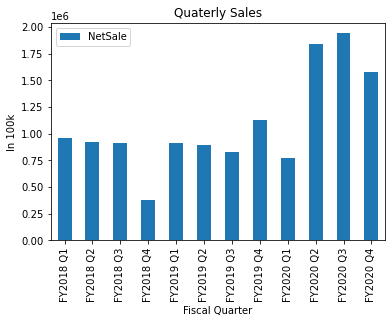

In [51]:

pvt.plot(kind="bar",title="Quaterly Sales",ylabel="In 100k")

array([<AxesSubplot:ylabel='NetSale'>], dtype=object)

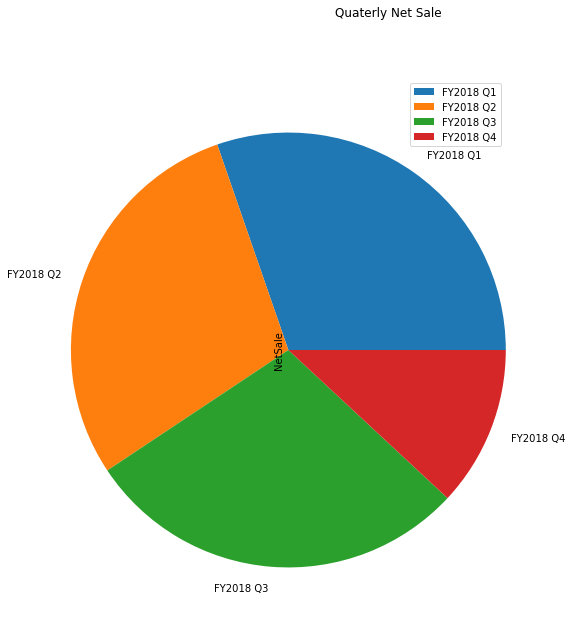

In [52]:
pvt.iloc[:4].plot(kind="pie",xlim=(0,1),title="Quaterly Net Sale",subplots="True",figsize=(10,10))

array([<AxesSubplot:ylabel='NetSale'>], dtype=object)

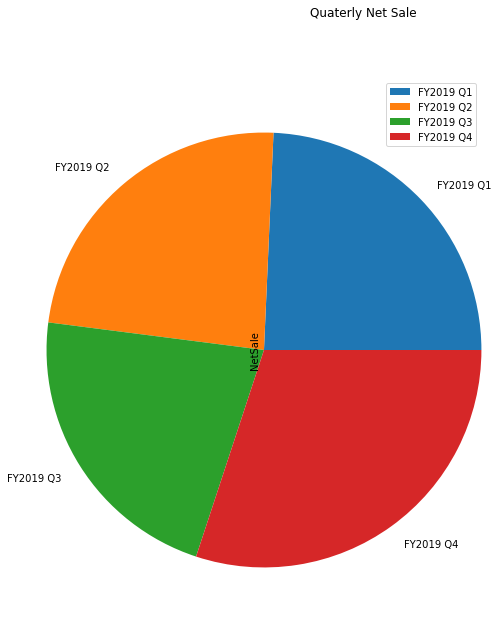

In [53]:
pvt.iloc[4:8].plot(kind="pie",xlim=(0,1),title="Quaterly Net Sale",subplots="True",figsize=(10,10))

array([<AxesSubplot:ylabel='NetSale'>], dtype=object)

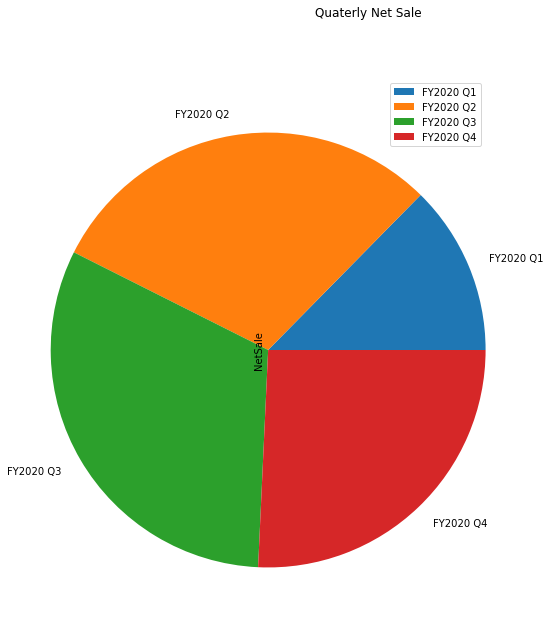

In [54]:
pvt.iloc[8:12].plot(kind="pie",xlim=(0,1),title="Quaterly Net Sale",subplots="True",figsize=(10,10))

In [56]:
P_df=df.get('Product_data')
P_df.head()

,ProductKey,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
0,210,FR-R92B-58,"HL Road Frame - Black, 58",868.6342,Black,1431.5000,HL Road Frame,Road Frames,Components
1,211,FR-R92R-58,"HL Road Frame - Red, 58",868.6342,Red,1431.5000,HL Road Frame,Road Frames,Components
2,212,HL-U509-R,"Sport-100 Helmet, Red",12.0278,Red,33.6442,Sport-100,Helmets,Accessories
3,213,HL-U509-R,"Sport-100 Helmet, Red",13.8782,Red,33.6442,Sport-100,Helmets,Accessories
4,214,HL-U509-R,"Sport-100 Helmet, Red",13.0863,Red,34.9900,Sport-100,Helmets,Accessories


In [57]:
SP=pd.merge(NewSD,P_df,how='inner',left_on='ProductKey',right_on="ProductKey")

In [58]:
SP.head()

,SalesOrderLineKey,ResellerKey,CustomerKey,ProductKey,OrderDateKey,DueDateKey,ShipDateKey,SalesTerritoryKey,Order Quantity,Unit Price,...,MonthKey,NetSale,SKU,Product,Standard Cost,Color,List Price,Model,Subcategory,Category
0,43659001,676,-1,349,20170702,20170712,20170709.0,5,1,2024.994,...,201707,127.0,BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes
1,43661011,442,-1,349,20170705,20170715,20170712.0,6,4,2024.994,...,201707,508.0,BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes
2,43665010,146,-1,349,20170707,20170717,20170714.0,1,1,2024.994,...,201707,127.0,BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes
3,43670004,504,-1,349,20170712,20170722,20170719.0,3,1,2024.994,...,201707,127.0,BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes
4,43672002,119,-1,349,20170716,20170726,20170723.0,6,2,2024.994,...,201707,254.0,BK-M82B-42,"Mountain-100 Black, 42",1898.0944,Black,3374.99,Mountain-100,Mountain Bikes,Bikes


In [90]:
pvtP=pd.pivot_table(SP, values='NetSale', index=["Category"],aggfunc=np.sum)

In [92]:
pvtP

,NetSale
Category,
Accessories,638601.0
Bikes,11008343.0
Clothing,387878.0
Components,1037890.0


array([<AxesSubplot:ylabel='NetSale'>], dtype=object)

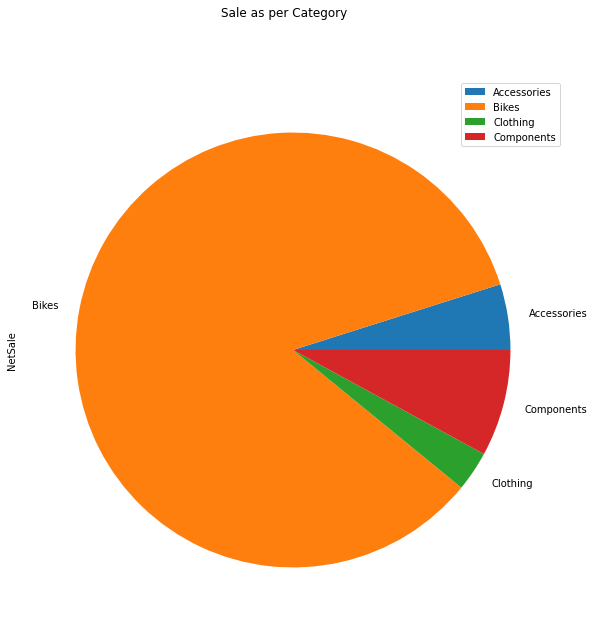

In [99]:
pvtP.plot(kind="pie",subplots="True",figsize=(10,10),title="Sale as per Category")

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [3]:
x = np.array([])
y = np.array([])

In [4]:
linreg = LinearRegression()

In [5]:
x = x.reshape(-1,1)
linreg.fit(x,y)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
y_pred  = linreg.predict(x)

In [ ]:
plt.show(x,y)
plt.plot(x, y_pred, color = 'red')
plt.show()

In [ ]:
print(linreg.coef_)

In [ ]:
print(linreg.intercept_)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import linear_model
%matplotlib inline
plt.style.use('ggplot')
import warmings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'warmings'

In [ ]:
df = pd.read_excel('linear regression data .xlsx')
df

In [ ]:
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot  = True)
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['X-axis'],df['Y-axis'],color='red')
plt.title("title 1",fontsize=14)
plt.xlabel('Title 2',fontsize=14)
plt.ylable('Title 1', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
n_df = df.drop('tile ',axis = 'columns')
n_df

In [ ]:
si = df['Title']
si

In [ ]:
# creating Linear regression object
lr = linear_model.LinearReegression()
lr.fit(n_df,si)

In [ ]:
# Let predict si for a given budget amount
lr.predict([[150]])

In [ ]:
y_predict = lr.fit(n_df)

In [ ]:
# Visual the predict amount as a line on the test set
# The scatter plot with best-fit inline looks like
plt.figure(figsize=12,6)
plt.scatter(df['ascsac'],df['ada'])
plt.plot(df['mad'],y_predict,'r')
plt.show()

In [ ]:
# Concerate a file with list of sales predictions
# Intercept value
print("Innd", lr.intercept_)

# SLope value
print('slope',lr.coef_)

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['ff'],df["csc"])
plt.show(df['fa'],0.05276*df['caa']+3.352,'r')
plt.show()

In [ ]:
plt.fig(figsize=(12,6))
x_as = range(len(df['aad']))
plt.plot(x_ax,y_predict, label = 'vwc')
plt.title('fwcsc')
plt.legend()
plt.show()

In [ ]:
sd = lr.predict(df)
sd

In [ ]:
df['partcular sales'] = ps
df

In [ ]:
df.to_csv("Forecasted_sales.csv")